In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf


train_dir = os.path.join(os.getcwd(), 'train')
test_dir = os.path.join(os.getcwd(), 'test')

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

print("train: ",train_dir)
train_dataset08 = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            validation_split=0.2,
                                                            subset="training",
                                                            seed=108,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

validation_dataset08 = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            validation_split=0.2,
                                                            subset="validation",
                                                            seed=108,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

train_dataset09 = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            validation_split=0.2,
                                                            subset="training",
                                                            seed=109,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

validation_dataset09 = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            validation_split=0.2,
                                                            subset="validation",
                                                            seed=109,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

train_dataset10 = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            validation_split=0.2,
                                                            subset="training",
                                                            seed=110,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

validation_dataset10 = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            validation_split=0.2,
                                                            subset="validation",
                                                            seed=110,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

train_dataset11 = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            validation_split=0.2,
                                                            subset="training",
                                                            seed=111,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

validation_dataset11 = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            validation_split=0.2,
                                                            subset="validation",
                                                            seed=111,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

train_dataset12 = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            validation_split=0.2,
                                                            subset="training",
                                                            seed=112,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

validation_dataset12 = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            validation_split=0.2,
                                                            subset="validation",
                                                            seed=112,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

print("test: ",test_dir)
test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

train:  C:\Users\65860\Desktop\SoftwareEngineering\Year2\ITP\Project\Traffic_ML\MobileNetV2 - Fixed FE Rate\train
Found 232 files belonging to 2 classes.
Using 186 files for training.
Found 232 files belonging to 2 classes.
Using 46 files for validation.
Found 232 files belonging to 2 classes.
Using 186 files for training.
Found 232 files belonging to 2 classes.
Using 46 files for validation.
Found 232 files belonging to 2 classes.
Using 186 files for training.
Found 232 files belonging to 2 classes.
Using 46 files for validation.
Found 232 files belonging to 2 classes.
Using 186 files for training.
Found 232 files belonging to 2 classes.
Using 46 files for validation.
Found 232 files belonging to 2 classes.
Using 186 files for training.
Found 232 files belonging to 2 classes.
Using 46 files for validation.
test:  C:\Users\65860\Desktop\SoftwareEngineering\Year2\ITP\Project\Traffic_ML\MobileNetV2 - Fixed FE Rate\test
Found 59 files belonging to 2 classes.


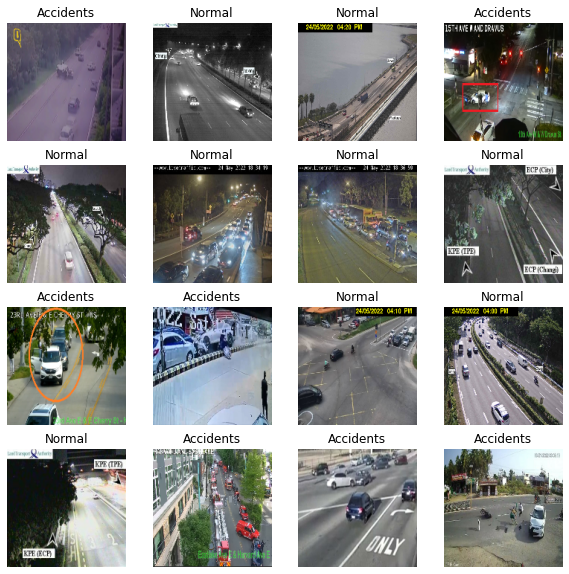

In [2]:
class_names08 = train_dataset08.class_names
class_names09 = train_dataset09.class_names
class_names10 = train_dataset10.class_names
class_names11 = train_dataset11.class_names
class_names12 = train_dataset12.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset08.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names08[labels[i]])
    plt.axis("off")

Configure the Dataset For Performance

In [3]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset08 = train_dataset08.prefetch(buffer_size=AUTOTUNE)
validation_dataset08 = validation_dataset08.prefetch(buffer_size=AUTOTUNE)

train_dataset09 = train_dataset09.prefetch(buffer_size=AUTOTUNE)
validation_dataset09 = validation_dataset09.prefetch(buffer_size=AUTOTUNE)

train_dataset10 = train_dataset10.prefetch(buffer_size=AUTOTUNE)
validation_dataset10 = validation_dataset10.prefetch(buffer_size=AUTOTUNE)

train_dataset11 = train_dataset11.prefetch(buffer_size=AUTOTUNE)
validation_dataset11 = validation_dataset11.prefetch(buffer_size=AUTOTUNE)

train_dataset12 = train_dataset12.prefetch(buffer_size=AUTOTUNE)
validation_dataset12 = validation_dataset12.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

# Data Augmentation

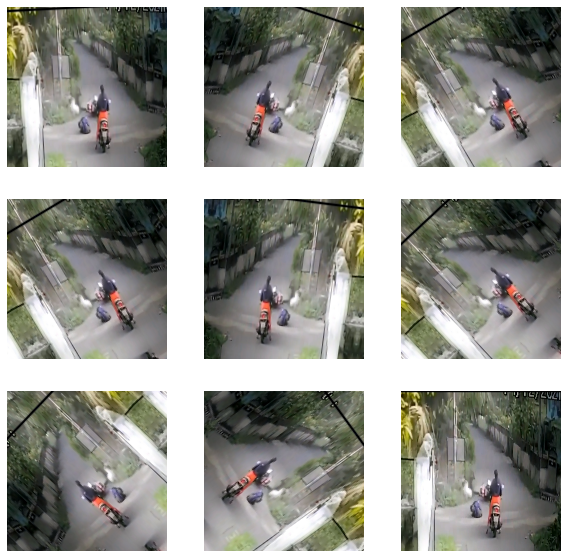

In [4]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

for image, _ in train_dataset08.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

Rescaling Pixel Values

In [5]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

# Creating Base Model from MobileNet V2

In [6]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model08 = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model09 = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model10 = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model11 = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model12 = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

image_batch, label_batch = next(iter(train_dataset08))
feature_batch = base_model08(image_batch)

print(feature_batch.shape)


(32, 5, 5, 1280)


In [7]:
### Freeze The Convolutional Base
#It is important to freeze the convolutional base before you compile and train the model. 
#Freezing (by setting layer.trainable = False) prevents the weights in a given layer from 
#being updated during training. MobileNet V2 has many layers, so setting the entire model's 
#trainable flag to False will freeze all of them.

base_model08.trainable = False
base_model09.trainable = False
base_model10.trainable = False
base_model11.trainable = False
base_model12.trainable = False

In [8]:
### Important note about BatchNormalization layers

#Many models contain `tf.keras.layers.BatchNormalization` layers. This layer is a special case and precautions 
#should be taken in the context of fine-tuning, as shown later in this tutorial. 

#When you set `layer.trainable = False`, the `BatchNormalization` layer will run in inference mode, and will 
#not update its mean and variance statistics. 

#When you unfreeze a model that contains BatchNormalization layers in order to do fine-tuning, you should keep 
#the BatchNormalization layers in inference mode by passing `training = False` when calling the base model. 
#Otherwise, the updates applied to the non-trainable weights will destroy what the model has learned.

#For more details, see the [Transfer learning guide](https://www.tensorflow.org/guide/keras/transfer_learning).

# Let's take a look at the base model architecture
base_model08.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 20, 20, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 20, 20, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 20, 20, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 20, 20, 32)  128         ['block_3_project[0][0]']        
 lization)

 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 10, 10, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 10, 10, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 10, 10, 384)  1536       ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_d

 block_10_project_BN (BatchNorm  (None, 10, 10, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 10, 10, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 10, 10, 576)  2304       ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 10, 10, 576)  0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_

                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 5, 5, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 5, 5, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 5, 5, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 5, 5, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
          

In [9]:
### Add a classification head

#To generate predictions from the block of features, average over the spatial `5x5` spatial locations, using a `tf.keras.layers.GlobalAveragePooling2D` layer to convert the features to  a single 1280-element vector per image.

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [10]:
#Apply a `tf.keras.layers.Dense` layer to convert these features into a single prediction per image. 
#You don't need an activation function here because this prediction will be treated as a `logit`, or 
#a raw prediction value. Positive numbers predict class 1, negative numbers predict class 0.

prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [11]:
#Build a model by chaining together the data augmentation, rescaling, `base_model` and feature extractor 
#layers using the [Keras Functional API](https://www.tensorflow.org/guide/keras/functional). As previously mentioned, 
#use `training=False` as our model contains a `BatchNormalization` layer.

inputs = tf.keras.Input(shape=(160, 160, 3))
x8 = data_augmentation(inputs)
x8 = preprocess_input(x8)
x8 = base_model08(x8, training=False)
x8 = global_average_layer(x8)
x8 = tf.keras.layers.Dropout(0.2)(x8)
outputs8 = prediction_layer(x8)
model08 = tf.keras.Model(inputs, outputs8)

x9 = data_augmentation(inputs)
x9 = preprocess_input(x9)
x9 = base_model09(x9, training=False)
x9 = global_average_layer(x9)
x9 = tf.keras.layers.Dropout(0.2)(x9)
outputs9 = prediction_layer(x9)
model09 = tf.keras.Model(inputs, outputs9)

x10 = data_augmentation(inputs)
x10 = preprocess_input(x10)
x10 = base_model10(x10, training=False)
x10 = global_average_layer(x10)
x10 = tf.keras.layers.Dropout(0.2)(x10)
outputs10 = prediction_layer(x10)
model10 = tf.keras.Model(inputs, outputs10)

x11 = data_augmentation(inputs)
x11 = preprocess_input(x11)
x11 = base_model11(x11, training=False)
x11 = global_average_layer(x11)
x11 = tf.keras.layers.Dropout(0.2)(x11)
outputs11 = prediction_layer(x11)
model11 = tf.keras.Model(inputs, outputs11)

x12 = data_augmentation(inputs)
x12 = preprocess_input(x12)
x12 = base_model12(x12, training=False)
x12 = global_average_layer(x12)
x12 = tf.keras.layers.Dropout(0.2)(x12)
outputs12 = prediction_layer(x12)
model12 = tf.keras.Model(inputs, outputs12)

In [12]:
### Compile the model

#Compile the model before training it. Since there are two classes, use the `tf.keras.losses.BinaryCrossentropy` 
#loss with `from_logits=True` since the model provides a linear output.

base_learning_rate = 0.0001
model08.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model09.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model10.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model11.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model12.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model12.summary()

#The 2.5 million parameters in MobileNet are frozen, but there are 1.2 thousand _trainable_ parameters in the Dense layer. 
#These are divided between two `tf.Variable` objects, the weights and biases.

len(model12.trainable_variables)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv_4 (TFOpLamb  (None, 160, 160, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_4 (TFOpLam  (None, 160, 160, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                           

2

0.000008

In [13]:
### Train the model

#After training for 10 epochs, you should see ~94% accuracy on the validation set.

from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

initial_epochs08 = 50
initial_epochs09 = 50
initial_epochs10 = 50
initial_epochs11 = 50
initial_epochs12 = 50

history08 = model08.fit(train_dataset08,
                    epochs=initial_epochs08,
                    validation_data=validation_dataset08,
                    callbacks =[earlystopping])



Epoch 1/50
6/6 [==============================] - 9s 669ms/step - loss: 0.8403 - accuracy: 0.5000 - val_loss: 0.6819 - val_accuracy: 0.4565
Epoch 2/50
6/6 [==============================] - 3s 436ms/step - loss: 0.8514 - accuracy: 0.4731 - val_loss: 0.6671 - val_accuracy: 0.4565
Epoch 3/50
6/6 [==============================] - 3s 440ms/step - loss: 0.7227 - accuracy: 0.5484 - val_loss: 0.6503 - val_accuracy: 0.5000
Epoch 4/50
6/6 [==============================] - 3s 437ms/step - loss: 0.7211 - accuracy: 0.5806 - val_loss: 0.6351 - val_accuracy: 0.5000
Epoch 5/50
6/6 [==============================] - 3s 433ms/step - loss: 0.6634 - accuracy: 0.6398 - val_loss: 0.6215 - val_accuracy: 0.5652
Epoch 6/50
6/6 [==============================] - 3s 436ms/step - loss: 0.6567 - accuracy: 0.6452 - val_loss: 0.6098 - val_accuracy: 0.6304
Epoch 7/50
6/6 [==============================] - 3s 430ms/step - loss: 0.6699 - accuracy: 0.6290 - val_loss: 0.5988 - val_accuracy: 0.6304
Epoch 8/50
6/6 [====

0.000009

In [14]:
history09 = model09.fit(train_dataset09,
                    epochs=initial_epochs09,
                    validation_data=validation_dataset09,
                    callbacks =[earlystopping])

Epoch 1/50
6/6 [==============================] - 9s 744ms/step - loss: 0.3927 - accuracy: 0.8226 - val_loss: 0.4501 - val_accuracy: 0.8043
Epoch 2/50
6/6 [==============================] - 3s 430ms/step - loss: 0.3595 - accuracy: 0.8602 - val_loss: 0.4569 - val_accuracy: 0.8043
Epoch 3/50
6/6 [==============================] - 3s 428ms/step - loss: 0.3720 - accuracy: 0.8548 - val_loss: 0.4592 - val_accuracy: 0.8043
Epoch 4/50
6/6 [==============================] - 3s 426ms/step - loss: 0.3640 - accuracy: 0.8387 - val_loss: 0.4557 - val_accuracy: 0.8043
Epoch 5/50
6/6 [==============================] - 3s 441ms/step - loss: 0.3511 - accuracy: 0.8172 - val_loss: 0.4455 - val_accuracy: 0.8043
Epoch 6/50
6/6 [==============================] - 3s 443ms/step - loss: 0.3327 - accuracy: 0.8441 - val_loss: 0.4366 - val_accuracy: 0.8043
Epoch 7/50
6/6 [==============================] - 3s 447ms/step - loss: 0.3471 - accuracy: 0.8333 - val_loss: 0.4316 - val_accuracy: 0.8043
Epoch 8/50
6/6 [====

0.00001

In [15]:
history10 = model10.fit(train_dataset10,
                    epochs=initial_epochs10,
                    validation_data=validation_dataset10,
                    callbacks =[earlystopping])

Epoch 1/50
6/6 [==============================] - 8s 709ms/step - loss: 0.2991 - accuracy: 0.8495 - val_loss: 0.1996 - val_accuracy: 0.9348
Epoch 2/50
6/6 [==============================] - 3s 437ms/step - loss: 0.3040 - accuracy: 0.8710 - val_loss: 0.1994 - val_accuracy: 0.9348
Epoch 3/50
6/6 [==============================] - 3s 436ms/step - loss: 0.3102 - accuracy: 0.8656 - val_loss: 0.1994 - val_accuracy: 0.9348
Epoch 4/50
6/6 [==============================] - ETA: 0s - loss: 0.3161 - accuracy: 0.8871

KeyboardInterrupt: 

0.000011

In [ ]:
history11 = model11.fit(train_dataset11,
                    epochs=initial_epochs11,
                    validation_data=validation_dataset11,
                    callbacks =[earlystopping])

0.000012

In [ ]:
history12 = model12.fit(train_dataset12,
                    epochs=initial_epochs12,
                    validation_data=validation_dataset12,
                    callbacks =[earlystopping])

# Fine tuning

In [ ]:
#In the feature extraction experiment, you were only training a few layers on top of an MobileNetV2 base model. 
#The weights of the pre-trained network were **not** updated during training.

#One way to increase performance even further is to train (or "fine-tune") the weights of the top layers of the 
#pre-trained model alongside the training of the classifier you added. The training process will force the weights 
#to be tuned from generic feature maps to features associated specifically with the dataset.

#Note: This should only be attempted after you have trained the top-level classifier with the pre-trained model set 
#to non-trainable. If you add a randomly initialized classifier on top of a pre-trained model and attempt to train 
#all layers jointly, the magnitude of the gradient updates will be too large (due to the random weights from the classifier) 
#and your pre-trained model will forget what it has learned.

#Also, you should try to fine-tune a small number of top layers rather than the whole MobileNet model. In most convolutional 
#networks, the higher up a layer is, the more specialized it is. The first few layers learn very simple and generic features 
#that generalize to almost all types of images. As you go higher up, the features are increasingly more specific to the dataset 
#on which the model was trained. The goal of fine-tuning is to adapt these specialized features to work with the new dataset, 
#rather than overwrite the generic learning.

### Un-freeze the top layers of the model


#All you need to do is unfreeze the `base_model` and set the bottom layers to be un-trainable. Then, you should recompile the 
#model (necessary for these changes to take effect), and resume training.

base_model08.trainable = True
base_model09.trainable = True
base_model10.trainable = True
base_model11.trainable = True
base_model12.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 5

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model08.layers[fine_tune_at:]:
  layer.trainable = False

for layer in base_model09.layers[fine_tune_at:]:
  layer.trainable = False

for layer in base_model10.layers[fine_tune_at:]:
  layer.trainable = False

for layer in base_model11.layers[fine_tune_at:]:
  layer.trainable = False

for layer in base_model12.layers[fine_tune_at:]:
  layer.trainable = False

In [ ]:
### Compile the model

#As you are training a much larger model and want to readapt the pretrained weights, it is important to use a lower 
#learning rate at this stage. Otherwise, your model could overfit very quickly.
ft_learning_rate08 = 0.000008
ft_learning_rate09 = 0.000009
ft_learning_rate10 = 0.00001
ft_learning_rate11 = 0.000011
ft_learning_rate12 = 0.000012

model08.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=ft_learning_rate08),
              metrics=['accuracy'])
model09.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=ft_learning_rate09),
              metrics=['accuracy'])
model10.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=ft_learning_rate10),
              metrics=['accuracy'])
model11.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=ft_learning_rate11),
              metrics=['accuracy'])
model12.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=ft_learning_rate12),
              metrics=['accuracy'])

model12.summary()

len(model12.trainable_variables)

08 FT

In [ ]:
### Continue training the model

#If you trained to convergence earlier, this step will improve your accuracy by a few percentage points.

fine_tune_epochs = 50
total_epochs08 =  initial_epochs08 + fine_tune_epochs
total_epochs09 =  initial_epochs09 + fine_tune_epochs
total_epochs10 =  initial_epochs10 + fine_tune_epochs
total_epochs11 =  initial_epochs11 + fine_tune_epochs
total_epochs12 =  initial_epochs12 + fine_tune_epochs

history_fine08 = model08.fit(train_dataset08,
                         epochs=total_epochs08,
                         initial_epoch=(history08.epoch[-1]+1),
                         validation_data=validation_dataset08,
                         callbacks =[earlystopping])

09 FT

In [ ]:
history_fine09 = model09.fit(train_dataset09,
                         epochs=total_epochs09,
                         initial_epoch=(history09.epoch[-1]+1),
                         validation_data=validation_dataset09,
                         callbacks =[earlystopping])

10 FT

In [ ]:
history_fine10 = model10.fit(train_dataset10,
                         epochs=total_epochs10,
                         initial_epoch=(history10.epoch[-1]+1),
                         validation_data=validation_dataset10,
                         callbacks =[earlystopping])

11 FT

In [ ]:
history_fine11 = model11.fit(train_dataset11,
                         epochs=total_epochs11,
                         initial_epoch=(history11.epoch[-1]+1),
                         validation_data=validation_dataset11,
                         callbacks =[earlystopping])

12 FT

In [ ]:
history_fine12 = model12.fit(train_dataset12,
                         epochs=total_epochs12,
                         initial_epoch=(history12.epoch[-1]+1),
                         validation_data=validation_dataset12,
                         callbacks =[earlystopping])

In [ ]:
#Let's take a look at the learning curves of the training and validation accuracy/loss when fine-tuning the last few 
#layers of the MobileNetV2 base model and training the classifier on top of it. The validation loss is much higher than the 
#training loss, so you may get some overfitting.

#You may also get some overfitting as the new training set is relatively small and similar to the original MobileNetV2 datasets.


#After fine tuning the model nearly reaches 98% accuracy on the validation set.
#----------------------------------------------------------------------- 08

acc08 = history08.history['accuracy']
acc08 += history_fine08.history['accuracy']

val_acc08 = history08.history['val_accuracy']
val_acc08 += history_fine08.history['val_accuracy']

loss08 = history08.history['loss']
loss08 += history_fine08.history['loss']

val_loss08 = history08.history['val_loss']
val_loss08 += history_fine08.history['val_loss']

#----------------------------------------------------------------------- 09

acc09 = history09.history['accuracy']
acc09 += history_fine09.history['accuracy']

val_acc09 = history09.history['val_accuracy']
val_acc09 += history_fine09.history['val_accuracy']

loss09 = history09.history['loss']
loss09 += history_fine09.history['loss']

val_loss09 = history09.history['val_loss']
val_loss09 += history_fine09.history['val_loss']

#----------------------------------------------------------------------- 10

acc10 = history10.history['accuracy']
acc10 += history_fine10.history['accuracy']

val_acc10 = history10.history['val_accuracy']
val_acc10 += history_fine10.history['val_accuracy']

loss10 = history10.history['loss']
loss10 += history_fine10.history['loss']

val_loss10 = history10.history['val_loss']
val_loss10 += history_fine10.history['val_loss']

#----------------------------------------------------------------------- 11

acc11 = history11.history['accuracy']
acc11 += history_fine11.history['accuracy']

val_acc11 = history11.history['val_accuracy']
val_acc11 += history_fine11.history['val_accuracy']

loss11 = history11.history['loss']
loss11 += history_fine11.history['loss']

val_loss11 = history11.history['val_loss']
val_loss11 += history_fine11.history['val_loss']

#----------------------------------------------------------------------- 12

acc12 = history12.history['accuracy']
acc12 += history_fine12.history['accuracy']

val_acc12 = history12.history['val_accuracy']
val_acc12 += history_fine12.history['val_accuracy']

loss12 = history12.history['loss']
loss12 += history_fine12.history['loss']

val_loss12 = history12.history['val_loss']
val_loss12 += history_fine12.history['val_loss']

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc08, label='Training Accuracy')
plt.plot(val_acc08, label='Validation Accuracy')
plt.ylim([0.3, 1])
plt.plot([initial_epochs08-1,initial_epochs08-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('08 Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss08, label='Training Loss')
plt.plot(val_loss08, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs08-1,initial_epochs08-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('08 Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
### Evaluation and prediction

#Finally you can verify the performance of the model on new data using test set.

#---------------------------------------------------------------------------------------------------------- 08

loss1_08, accuracy1_08 = model08.evaluate(test_dataset)
loss2_08, accuracy2_08 = model08.evaluate(test_dataset)
loss3_08, accuracy3_08 = model08.evaluate(test_dataset)
summationAcc_08 = accuracy1_08+accuracy2_08+accuracy3_08
summationLoss_08 = loss1_08+loss2_08+loss3_08
averageAcc_08 = summationAcc_08/3
averageLoss_08 = summationLoss_08/3
print("08 results:")
print("The 1st test accuracy is {} and loss is {}".format(accuracy1_08, loss1_08))
print("The 2nd test accuracy is {} and loss is {}".format(accuracy2_08, loss2_08))
print("The 3rd test accuracy is {} and loss is {}".format(accuracy3_08, loss3_08))
print("The summation accuracy is {} and summation loss is {}".format(summationAcc_08, summationLoss_08))
print("The average accuracy is {} and average loss is {}".format(averageAcc_08, averageLoss_08))

#---------------------------------------------------------------------------------------------------------- 09

loss1_09, accuracy1_09 = model09.evaluate(test_dataset)
loss2_09, accuracy2_09 = model09.evaluate(test_dataset)
loss3_09, accuracy3_09 = model09.evaluate(test_dataset)
summationAcc_09 = accuracy1_09+accuracy2_09+accuracy3_09
summationLoss_09 = loss1_09+loss2_09+loss3_09
averageAcc_09 = summationAcc_09/3
averageLoss_09 = summationLoss_09/3
print("09 results:")
print("The 1st test accuracy is {} and loss is {}".format(accuracy1_09, loss1_09))
print("The 2nd test accuracy is {} and loss is {}".format(accuracy2_09, loss2_09))
print("The 3rd test accuracy is {} and loss is {}".format(accuracy3_09, loss3_09))
print("The summation accuracy is {} and summation loss is {}".format(summationAcc_09, summationLoss_09))
print("The average accuracy is {} and average loss is {}".format(averageAcc_09, averageLoss_09))

#---------------------------------------------------------------------------------------------------------- 10

loss1_10, accuracy1_10 = model10.evaluate(test_dataset)
loss2_10, accuracy2_10 = model10.evaluate(test_dataset)
loss3_10, accuracy3_10 = model10.evaluate(test_dataset)
summationAcc_10 = accuracy1_10+accuracy2_10+accuracy3_10
summationLoss_10 = loss1_10+loss2_10+loss3_10
averageAcc_10 = summationAcc_10/3
averageLoss_10 = summationLoss_10/3
print("10 results:")
print("The 1st test accuracy is {} and loss is {}".format(accuracy1_10, loss1_10))
print("The 2nd test accuracy is {} and loss is {}".format(accuracy2_10, loss2_10))
print("The 3rd test accuracy is {} and loss is {}".format(accuracy3_10, loss3_10))
print("The summation accuracy is {} and summation loss is {}".format(summationAcc_10, summationLoss_10))
print("The average accuracy is {} and average loss is {}".format(averageAcc_10, averageLoss_10))

#---------------------------------------------------------------------------------------------------------- 11

loss1_11, accuracy1_11 = model11.evaluate(test_dataset)
loss2_11, accuracy2_11 = model11.evaluate(test_dataset)
loss3_11, accuracy3_11 = model11.evaluate(test_dataset)
summationAcc_11 = accuracy1_11+accuracy2_11+accuracy3_11
summationLoss_11 = loss1_11+loss2_11+loss3_11
averageAcc_11 = summationAcc_11/3
averageLoss_11 = summationLoss_11/3
print("11 results:")
print("The 1st test accuracy is {} and loss is {}".format(accuracy1_11, loss1_11))
print("The 2nd test accuracy is {} and loss is {}".format(accuracy2_11, loss2_11))
print("The 3rd test accuracy is {} and loss is {}".format(accuracy3_11, loss3_11))
print("The summation accuracy is {} and summation loss is {}".format(summationAcc_11, summationLoss_11))
print("The average accuracy is {} and average loss is {}".format(averageAcc_11, averageLoss_11))

#---------------------------------------------------------------------------------------------------------- 12

loss1_12, accuracy1_12 = model12.evaluate(test_dataset)
loss2_12, accuracy2_12 = model12.evaluate(test_dataset)
loss3_12, accuracy3_12 = model12.evaluate(test_dataset)
summationAcc_12 = accuracy1_12+accuracy2_12+accuracy3_12
summationLoss_12 = loss1_12+loss2_12+loss3_12
averageAcc_12 = summationAcc_12/3
averageLoss_12 = summationLoss_12/3
print("12 results:")
print("The 1st test accuracy is {} and loss is {}".format(accuracy1_12, loss1_12))
print("The 2nd test accuracy is {} and loss is {}".format(accuracy2_12, loss2_12))
print("The 3rd test accuracy is {} and loss is {}".format(accuracy3_12, loss3_12))
print("The summation accuracy is {} and summation loss is {}".format(summationAcc_12, summationLoss_12))
print("The average accuracy is {} and average loss is {}".format(averageAcc_12, averageLoss_12))

In [ ]:
#And now you are all set to use this model to predict if your pet is a normal or accident.

# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()


predictions08 = model08.predict_on_batch(image_batch).flatten()
predictions09 = model09.predict_on_batch(image_batch).flatten()
predictions10 = model10.predict_on_batch(image_batch).flatten()
predictions11 = model11.predict_on_batch(image_batch).flatten()
predictions12 = model12.predict_on_batch(image_batch).flatten()


# Apply a sigmoid since our model returns logits
predictions08 = tf.nn.sigmoid(prediction08)
predictions08 = tf.where(predictions08 < 0.5, 0, 1)

predictions09 = tf.nn.sigmoid(prediction09)
predictions09 = tf.where(predictions09 < 0.5, 0, 1)

predictions10 = tf.nn.sigmoid(prediction10)
predictions10 = tf.where(predictions10 < 0.5, 0, 1)

predictions11 = tf.nn.sigmoid(prediction11)
predictions11 = tf.where(predictions11 < 0.5, 0, 1)

predictions12 = tf.nn.sigmoid(prediction12)
predictions12 = tf.where(predictions12 < 0.5, 0, 1)

print('Predictions for 08')
print('Predictions:\n', predictions08.numpy())
print('Labels:\n', label_batch)
print('\n')
print('Predictions for 09')
print('Predictions:\n', predictions09.numpy())
print('Labels:\n', label_batch)
print('\n')
print('Predictions for 10')
print('Predictions:\n', predictions10.numpy())
print('Labels:\n', label_batch)
print('\n')
print('Predictions for 11')
print('Predictions:\n', predictions11.numpy())
print('Labels:\n', label_batch)
print('\n')
print('Predictions for 12')
print('Predictions:\n', predictions12.numpy())
print('Labels:\n', label_batch)


print('For 08')
plt.figure(figsize=(10, 10))
for i in range(25):
  ax = plt.subplot(5, 5, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names08[predictions08[i]])
  plt.axis("off")

    
    
print('For 09')
plt.figure(figsize=(10, 10))
for i in range(25):
  ax = plt.subplot(5, 5, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names09[predictions09[i]])
  plt.axis("off")
    
    
print('For 10')
plt.figure(figsize=(10, 10))
for i in range(25):
  ax = plt.subplot(5, 5, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names10[predictions10[i]])
  plt.axis("off")
    
    
print('For 11')
plt.figure(figsize=(10, 10))
for i in range(25):
  ax = plt.subplot(5, 5, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names11[predictions11[i]])
  plt.axis("off")
    
    
print('For 12')
plt.figure(figsize=(10, 10))
for i in range(25):
  ax = plt.subplot(5, 5, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names12[predictions12[i]])
  plt.axis("off")